# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2019-2020 учебный год

Лектор: Илья Щуров

Семинаристы: Соня Дымченко, Руслан Хайдуров

# Семинар 3

Сегодня мы узнаем

* Как работает метод ближайших соседей, какие у него есть параметры и на что они влияют.
* Что такое разложение ошибки на шум, смещение и разброс.
* Что такое кросс-валидация и какой она бывает.

# Метод k ближайших соседей

Метод k ближайших соседей (k nearest neighbours, k-NN) является одним из простейших алгоритмов машинного обучения. Несмотря на свою простоту, k-NN может превзойти более мощные алгоритмы и используется во множестве приложений, таких как экономическое прогнозирование, сжатие данных и генетика. Например, k-NN использовалась в [исследовании](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-S1-S11) по функциональной геномике в 2006 году, где гены определялись на основе их профилей экспрессии.

## Как работает k-NN?

Начнем с введения некоторых определений и обозначений.

* Пусть $x \in X$ — вектор признаков (или атрибутов) объекта. Обычно $X=\mathbb R^d$.
* Под $y$ мы будем подразумевать значение, которое мы хотим научиться предсказывать. Оно может быть числом (тогда говорят о *задаче регрессии*) или элементом конечного множества (*классом* или *меткой*, тогда говорят о *задаче классификации*). Например, предсказать выручку магазина по его месторасположению — это задача регрессии, а определить, болен человек некоторой конкретной болезнью или нет — задача классификации.

k-NN входит в число **supervised** алгоритмов или алгоритмов «обучения с учителем».
Это означает, что нам предоставляется набор данных $(x_1, y_1), \ldots, (x_n, y_n)$, в котором приведены признаки и верные ответы для $n$ каких-то объектов. Целью является на основе предоставляемой выборки найти связь между $x$ и $y$, то есть восстановить функцию $h: X \rightarrow Y$. Имея такую функцию, мы можем предсказать $y$ по имеющемуся наблюдению $x$.

Для нового объекта с вектором признаков $x_{new}$ алгоритм k-NN находит $k$ ближайших к $x_{new}$ точек среди $x_1, \ldots, x_n$. Пусть они имеют индексы $i_1, \ldots, i_k$. Для задачи регрессии в качестве $h(x)$ используется среднее соответствующих значений $y$, то есть

$$h(x)=\frac{1}{k}\sum_{i=1}^k y_{i_k}.$$

Для задачи классификации в качестве $h(x)$ используется то значение $y$, которое встречается среди $y_{i_1}, \ldots, y_{i_k}$ чаще всего (если таких значений несколько, выбирается какое-то одно из них — например, самое маленькое для какого-то порядка на классах).

## Реализация k-NN вручную

Чтобы лучше понять, как работает kNN, реализуем его «вручную». Наша реализация будет довольно неэффективной — для реальной работы мы будем использовать реализацию в библиотеке scikit-learn, которая использует хитрые структуры данных для быстрого поиска ближайшего соседа. Мы же будем банально сортировать все элементы по близости к новому и выбирать k самых близких. Это дико неэффективно, но зато понятно, как работает.

In [0]:
import numpy as np

In [0]:
def kNN_regression(x_train, y_train, x_new, k=1):
    """
    x_train is np.array with shape (n, d) (matrix with n rows, d columns)
    y_train is np.array with shape (n, ) (1-dimensional array with n elements)
    x_new is np.array with shape (d,) (1-dimensional array with d elements)
    """
    # YOUR CODE HERE
    pass

## Синтезированные данные
Посмотрим, как работает k-NN на примере синтезированных данных. Пусть реальная зависимость $y$ и $x$ задаётся правилом $y=x^2+\varepsilon$, где $\varepsilon$ — некоторый шум с нулевым матожиданием.

Точнее, мы будем рассматривать следующую модель:

\begin{gather}
X \sim Uniform(-1, 1);\\
\varepsilon \sim \mathcal N(0, \varepsilon_0)\\
Y = X^2 + \varepsilon,
\end{gather}

где $Uniform(-1, 1)$ — равномерное распределение на отрезке $[-1, 1]$, переменные $X$ и $\varepsilon$ независимы.

In [0]:
def f(x):
    return x ** 2

# Y | X = X^2 + \eps

def make_data(n, eps0):
    # YOUR CODE HERE
    pass

In [0]:
X, Y = make_data(30, 0.1)

Как обсуждалось на лекции, наилучшим предсказанием $y$ для данного $x$ с точки зрения минимизации ожидаемой ошибки для квадратичной функции потерь является условное матожидание $E[Y\mid X=x]$. Для нашей модели

$$E[Y\mid X=x]=x^2.$$

### Эффект от изменения $k$ 

Посмотрим, как работает k-NN для наших данных.

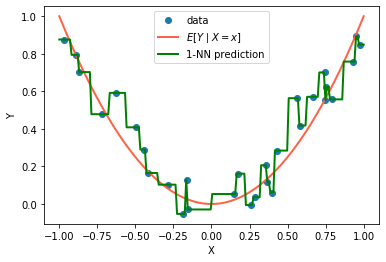

In [0]:
def plot_kNN(X, Y, k, **kwargs):
    plt.plot(X[:, 0], Y, 'o', label="data", **kwargs)
    x_grid = np.linspace(-1, 1, 200)
    plt.plot(x_grid, f(x_grid), color='tomato', lw=2, label="$E[Y\mid X=x]$")
    plt.plot(x_grid, [kNN_regression(X, Y, x_new, k) for x_new in x_grid], 
             'g-', label="{}-NN prediction".format(k), lw=2)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
plot_kNN(X, Y, 1)

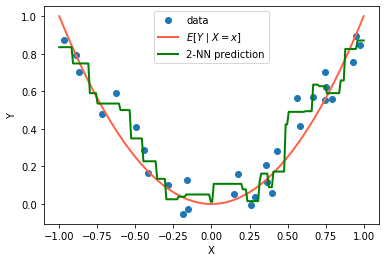

In [0]:
plot_kNN(X, Y, 2)

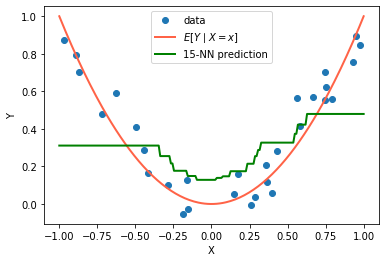

In [0]:
plot_kNN(X, Y, 15)

Что будет, если увеличить количество данных?

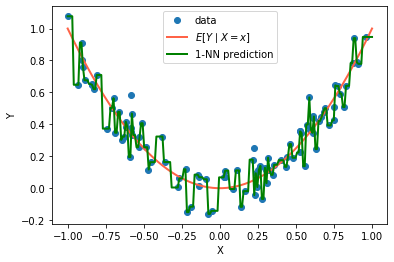

In [0]:
X, Y = make_data(100, 0.1)
plot_kNN(X, Y, 1)

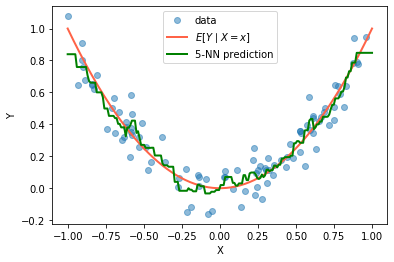

In [0]:
plot_kNN(X, Y, 5, alpha=0.5)

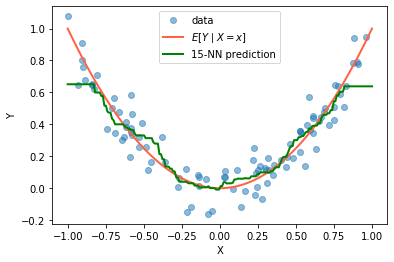

In [0]:
plot_kNN(X, Y, 15, alpha=0.5)

In [0]:
X, Y = make_data(1000, 0.1)
plot_kNN(X, Y, 35, markersize=3, alpha=0.03)

**Теорема**. Если $f(x)=E[Y\mid X=x]$ является непрерывной функцией от $x$, при некоторых дополнительных условиях, k-NN-регрессия даёт состоятельную оценку для $f(x)$ при $k, N \to \infty$, т.ч. $k/N\to 0$.

**Основная идея:** если данных очень много, то можно выбрать такое большое $k$, которое было бы при этом мало по сравнению с $N$. При этом $k$ ближайших соседей для точки $x_{new}$ будут лежать очень близко к ней, и, за счёт того, что $k$ большое, k-NN оценка будет достаточно близкой к истинному матожиданию $f(x_{new})$.

### Смещенность k-NN-оценки

Мы считаем наши данные $(x_1, y_1), \ldots, (x_n, y_n)$ результатом независимых реализаций случайной величины $(X, Y)$. Алгоритм машинного обучения (например, k-NN) обучается на данных и его ответы зависят от того, какие данные он «увидел». Следовательно, ответы алгоритма для фиксированного $x_{new}$ также являются результатом реализации случайной величины. 

Чтобы увидеть это наглядно, сгенерируем несколько разных выборок из одного и того же распределения, обучим на каждом kNN-регрессию и построим графики предсказаний.

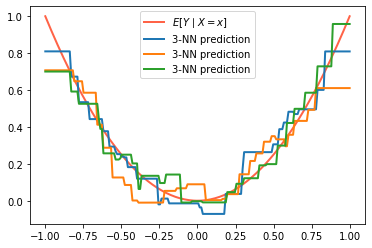

In [0]:
x_grid = np.linspace(-1, 1, 200)
plt.plot(x_grid, f(x_grid), color='tomato', lw=2, label="$E[Y\mid X=x]$")
k = 3
for i in range(3):
    X, Y = make_data(30, 0.1)
    plt.plot(x_grid, [kNN_regression(X, Y, x_new, k) for x_new in x_grid], 
             label="{}-NN prediction #{}".format((k, i)), lw=2)
plt.legend()
plt.show()

Нас будет интересовать матожидание предсказания: мы хотим понять, является ли k-NN-оценка несмещённой для истинной зависимости $y=f(x)$.

Чтобы дать ответ на этот вопрос, сделаем следующее. Сгенерируем выборку много раз. Каждый раз будем обучать алгоритм на новой выборке и запрашивать предсказание для каких-то значений $x_{new}$. Запомним предсказания, а затем усредним их.

Для ускорения работы мы будем использовать готовый kNN из библиотеки scikit-learn вместо нашего самописного. Помимо прочего, он умеет находить предсказания сразу для массива значений $x$.

In [0]:
from tqdm import tqdm
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)

def f(x):
    return x**2

gridpoints = 200
n = 100
samples = 1000

# YOUR CODE 

#1. Сгенерируем выборку много раз. 
#2. Каждый раз будем обучать алгоритм на новой выборке и запрашивать предсказание для каких-то значений  xnew . 
#3. Запомним предсказания, а затем усредним их.

In [0]:
# YOUR PLOT

**Вопросы**

1. Является ли k-NN оценка несмещнной оценкой для $E[y\mid X=x]$ согласно результатам экспериментов? Как вы можете это объяснить?
2. Как зависит степень смещённости от $k$ при фиксированном количестве данных? Почему?
3. Как зависит степень смещённости от количества данных ($n$) при фиксированном $k$? Почему?
3. Как будет выглядеть картинка, если взять $f(x)=\sin 5x$? В каких точках матожидание оценок будет больше истинного матождиания, в каких меньше? Почему? (Запрограммируйте и объясните.)

In [0]:
# YOUR CODE HERE

### Разброс k-NN оценки
Помимо смещённости нас также интересует дисперсия (разброс) предсказаний, которые даёт k-NN. Модифицируйте код выше таким образом, чтобы он строил график разброса (несколько графиков разброса, соответствующих разным значениям $k$). Как влияет $k$ на разброс?

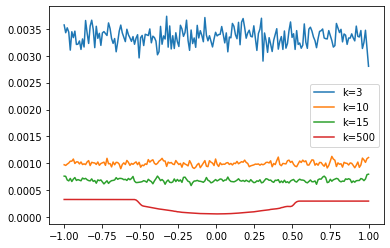

In [0]:
from sklearn.neighbors import KNeighborsRegressor

for k in [3, 10, 15, 500]:
    knn = KNeighborsRegressor(n_neighbors=k)

    gridpoints = 200
    n = 1000
    samples = 1000

    # YOUR SAME CODE 

    # Variance = E_xE_X(a(X)(x) - E_X(a(X)(x)))^2
    # E_X = mean(axis=1)
    
    # YOUR PLOT
    
plt.legend()
plt.show()

## Разложение ожидаемой ошибки на шум, смещение и разброс


<img src="https://qph.fs.quoracdn.net/main-qimg-a222c081325070d06d64966c68359283-c" width="360" align="center">

Почему нас так интересует смещённость и разброс предсказаний? Оказывается, они определяют, насколько сильно будет ошибаться алгоритм. Пусть $(x_{data}, y_{data})$ — обучающая выборка, $(x_{new}, y_{new})$ — новая точка, полученная из того же распределения $(X, Y)$, $a(x_{data}, y_{data})$, алгоритм, обученный на данной выборке, $a(x_{data}, y_{data})(x_{new})$ — его предсказание в точке $x_{new}$. На следующей лекции мы докажем, что ожидаемую среднеквадратичную ошибку предсказания для произвольной точки $x_{new}$ можно разложить на три компоненты следующим образом:

\begin{align}
\mathbb E[(a(x_{data}, y_{data})(x_{new})-y_{new})^2]  = & \mathbb E[(y_{new}-\mathbb E[y_{new}])^2] +\\
(&\mathbb E[a(x_{data}, y_{data})(x_{new})]-\mathbb E[y_{new}])^2+\\
& \mathbb E[(a(x_{data}, y_{data})(x_{new}) - \mathbb E[a(x_{data}, y_{data})(x_{new})])^2].
\end{align}

Во всех матожиданиях $y_{new}$ выбирается из условного  распределения $Y\mid X=x_{new}$.

Первое слагаемое называется «*шумом*» (noise). Оно показывает, насколько сильно ответы $y_{new}$ отличаются от своих средних значений («идеальных предсказаний»). Мы не могли бы сделать ожидаемую ошибку меньше шума, даже если бы знали истинное распределение $(X, Y)$.

Второе слагаемое — это *смещение* (bias) нашей оценки. Оно показывает, насколько сильно средний ответ алгоритма (усреднение происходит по разным обучающим выборкам) отличается от «идеального предсказания» $\mathbb E[Y \mid X=x_{new}]$.

Наконец, третье слагаемое называется *разбросом*. Это дисперсия предсказания. Она показывает, насколько разные мы можем получать предсказания при обучении алгоритма на разных выборках, взятых из одного и того же распределения. Иными словами, оно показывает, насколько чувствителен наш алгоритм к данным.

**Вопрос.** В соответствии с результатами, полученными ранее, что вы можете сказать о выборе оптимального $k$ для k-NN? Правда ли, что $k$ нужно делать как можно больше, чтобы уменьшить разброс предсказаний? Правда ли, что $k$ нужно делать как можно меньше, чтобы уменьшить смещение предсказаний?

### kNN для задачи классификации
Напишите функцию `kNN_classifier(x_train, y_train, x_new, k=1)` по аналогии с `kNN_regression`. Вместо взятие среднего нужно выбрать значение $y$, которое встречается среди $k$ ближайших соседей чаще всего. (Подсказка: оно называется *модой*.)

In [0]:
def kNN_classifier(x_train, y_train, x_new, k=1):
    # YOUR CODE HERE
    pass